# Mood Meets Media - Data Exploration

This notebook explores mood logs, journal entries, and media metadata.

## Load and Inspect Data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load mood logs
mood_df = pd.read_csv("C:/Users/Vanathi//mood-meets-media/data/raw/mood_logs.csv")
media_df = pd.read_csv("C:/Users/Vanathi//mood-meets-media/data/raw/media_metadata.csv")

# Convert date to datetime
mood_df['date'] = pd.to_datetime(mood_df['date'])

# Basic cleaning
mood_df['mood'] = mood_df['mood'].str.title().str.strip()


In [20]:
train_df = pd.read_csv("C:/Users/Vanathi//mood-meets-media/data/external/emotion_dataset/training.csv")
test_df = pd.read_csv("C:/Users/Vanathi//mood-meets-media/data/external/emotion_dataset/test.csv")
val_df = pd.read_csv("C:/Users/Vanathi//mood-meets-media/data/external/emotion_dataset/validation.csv")

In [52]:
# Combine all
emotion_df = pd.concat([train_df, test_df, val_df], ignore_index=True)
emotion_df.to_csv("C:/Users/Vanathi//mood-meets-media/data/processed/enriched_mood_logs.csv", index=False)


In [53]:
# Map labels
emotion_mapping = {
    1: 'Happy',
    2: 'Happy',
    5: 'Excited',
    3: 'Stressed',
    4: 'Anxious',
    0: 'Sad'
}

In [54]:
emotion_df = emotion_df.rename(columns={"text": "journal_entry", "label": "mood"})
emotion_df["mood"] = emotion_df["mood"].map(emotion_mapping)
#emotion_df = emotion_df.dropna(subset=["mood"])
emotion_df.to_csv("C:/Users/Vanathi//mood-meets-media/data/processed/enriched_mood_logs.csv", index=False)

In [55]:
# Add fake date column
start_date = datetime.strptime("2025-01-01", "%Y-%m-%d")
emotion_df["date"] = [start_date + timedelta(days=int(i)) for i in range(len(emotion_df))]

In [57]:
# Reorder columns and save
emotion_df = emotion_df[["date", "mood", "journal_entry"]]
os.makedirs("data/processed", exist_ok=True)
emotion_df.to_csv("C:/Users/Vanathi//mood-meets-media/data/processed/enriched_mood_logs.csv", index=False)

In [58]:
print("✅ Enriched mood log saved to data/processed/enriched_mood_logs.csv")

✅ Enriched mood log saved to data/processed/enriched_mood_logs.csv


## Visualize Mood Trends

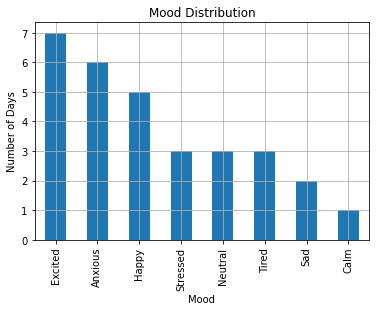

In [2]:
# Visualize mood counts
mood_counts = mood_df['mood'].value_counts()
mood_counts.plot(kind='bar', title='Mood Distribution')
plt.ylabel("Number of Days")
plt.xlabel("Mood")
plt.grid(True)
plt.show()

## Summary Statistics

In [7]:
# Show head of dataset
mood_df.head()

,date,mood,journal_entry
0,2025-04-01,Happy,"Feeling really good today, had a productive mo..."
1,2025-04-02,Anxious,Nervous about the presentation tomorrow.
2,2025-04-03,Tired,Exhausted from barely sleeping last night.
3,2025-04-04,Excited,Pumped after my workout!
4,2025-04-05,Neutral,Just an average day.
